In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [44]:
df_train = pd.read_csv('./training_data.csv') #stored in what is called a dataframe-training samples
df_test = pd.read_csv('./testing_data.csv') #stored in what is called a dataframe-testing samples

In [45]:
#A snap shot of the training dataframe
df_train.head()

,Id,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SaleCondition,SalePrice
0,1,8450,CollgCr,7,5,2003,3,2,8,1710,Normal,208500
1,2,9600,Veenker,6,8,1976,3,2,6,1262,Normal,181500
2,3,11250,CollgCr,7,5,2001,3,2,6,1786,Normal,223500
3,4,9550,Crawfor,7,5,1915,3,3,7,1717,Abnorml,140000
4,5,14260,NoRidge,8,5,2000,4,3,9,2198,Normal,250000


In [46]:
#A snap shot of the testing dataframe
df_test.head()

,Id,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SaleCondition,SalePrice
0,1461,11622,NAmes,5,6,1961,2,1.0,5,896,Normal,169277.0525
1,1462,14267,NAmes,6,6,1958,3,1.0,6,1329,Normal,187758.3940
2,1463,13830,Gilbert,5,5,1997,3,2.0,6,1629,Normal,183583.6836
3,1464,9978,Gilbert,6,6,1998,3,2.0,7,1604,Normal,179317.4775
4,1465,5005,StoneBr,8,5,1992,2,2.0,5,1280,Normal,150730.0800


In [47]:
#the coloumns of train dataframe
df_train.columns

Index(['Id', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Bedroom', 'GarageCars', 'TotRms', 'GrLivArea',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [48]:
#Checking for the missing values
print('missing values in train dataframe', sum(df_train.isna().sum()))
print('missing values in test dataframe', sum(df_test.isna().sum()))

missing values in train dataframe 0
missing values in test dataframe 1


In [49]:
#So let's remove this missing value in the test dataframe
df_test = df_test.dropna(axis=0)

In [50]:
#Looking at the statistical summary of both data frames
df_train.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,5.575342,1971.267808,2.866438,1.767123,6.517808,1515.463699,180921.195890
std,421.610009,9981.264932,1.382997,1.112799,30.202904,0.815778,0.747315,1.625393,525.480383,79442.502883
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,2.000000,334.000000,34900.000000
25%,365.750000,7553.500000,5.000000,5.000000,1954.000000,2.000000,1.000000,5.000000,1129.500000,129975.000000
50%,730.500000,9478.500000,6.000000,5.000000,1973.000000,3.000000,2.000000,6.000000,1464.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,6.000000,2000.000000,3.000000,2.000000,7.000000,1776.750000,214000.000000
max,1460.000000,215245.000000,10.000000,9.000000,2010.000000,8.000000,4.000000,14.000000,5642.000000,755000.000000


In [51]:
df_test.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,2189.734568,9819.681756,6.079561,5.553498,1971.390947,2.853909,1.766118,6.385460,1485.811385,179185.492144
std,421.343847,4957.177700,1.437027,1.114060,30.374071,0.830064,0.775945,1.509379,485.650025,16523.861242
min,1461.000000,1470.000000,1.000000,1.000000,1879.000000,0.000000,0.000000,3.000000,407.000000,135751.318900
25%,1825.250000,7390.500000,5.000000,5.000000,1953.000000,2.000000,1.000000,5.000000,1117.250000,168696.541750
50%,2189.500000,9413.500000,6.000000,5.000000,1973.000000,3.000000,2.000000,6.000000,1431.000000,179221.296050
75%,2553.750000,11518.750000,7.000000,6.000000,2001.000000,3.000000,2.000000,7.000000,1721.000000,186804.010100
max,2919.000000,56600.000000,10.000000,9.000000,2010.000000,6.000000,5.000000,15.000000,5095.000000,281643.976100


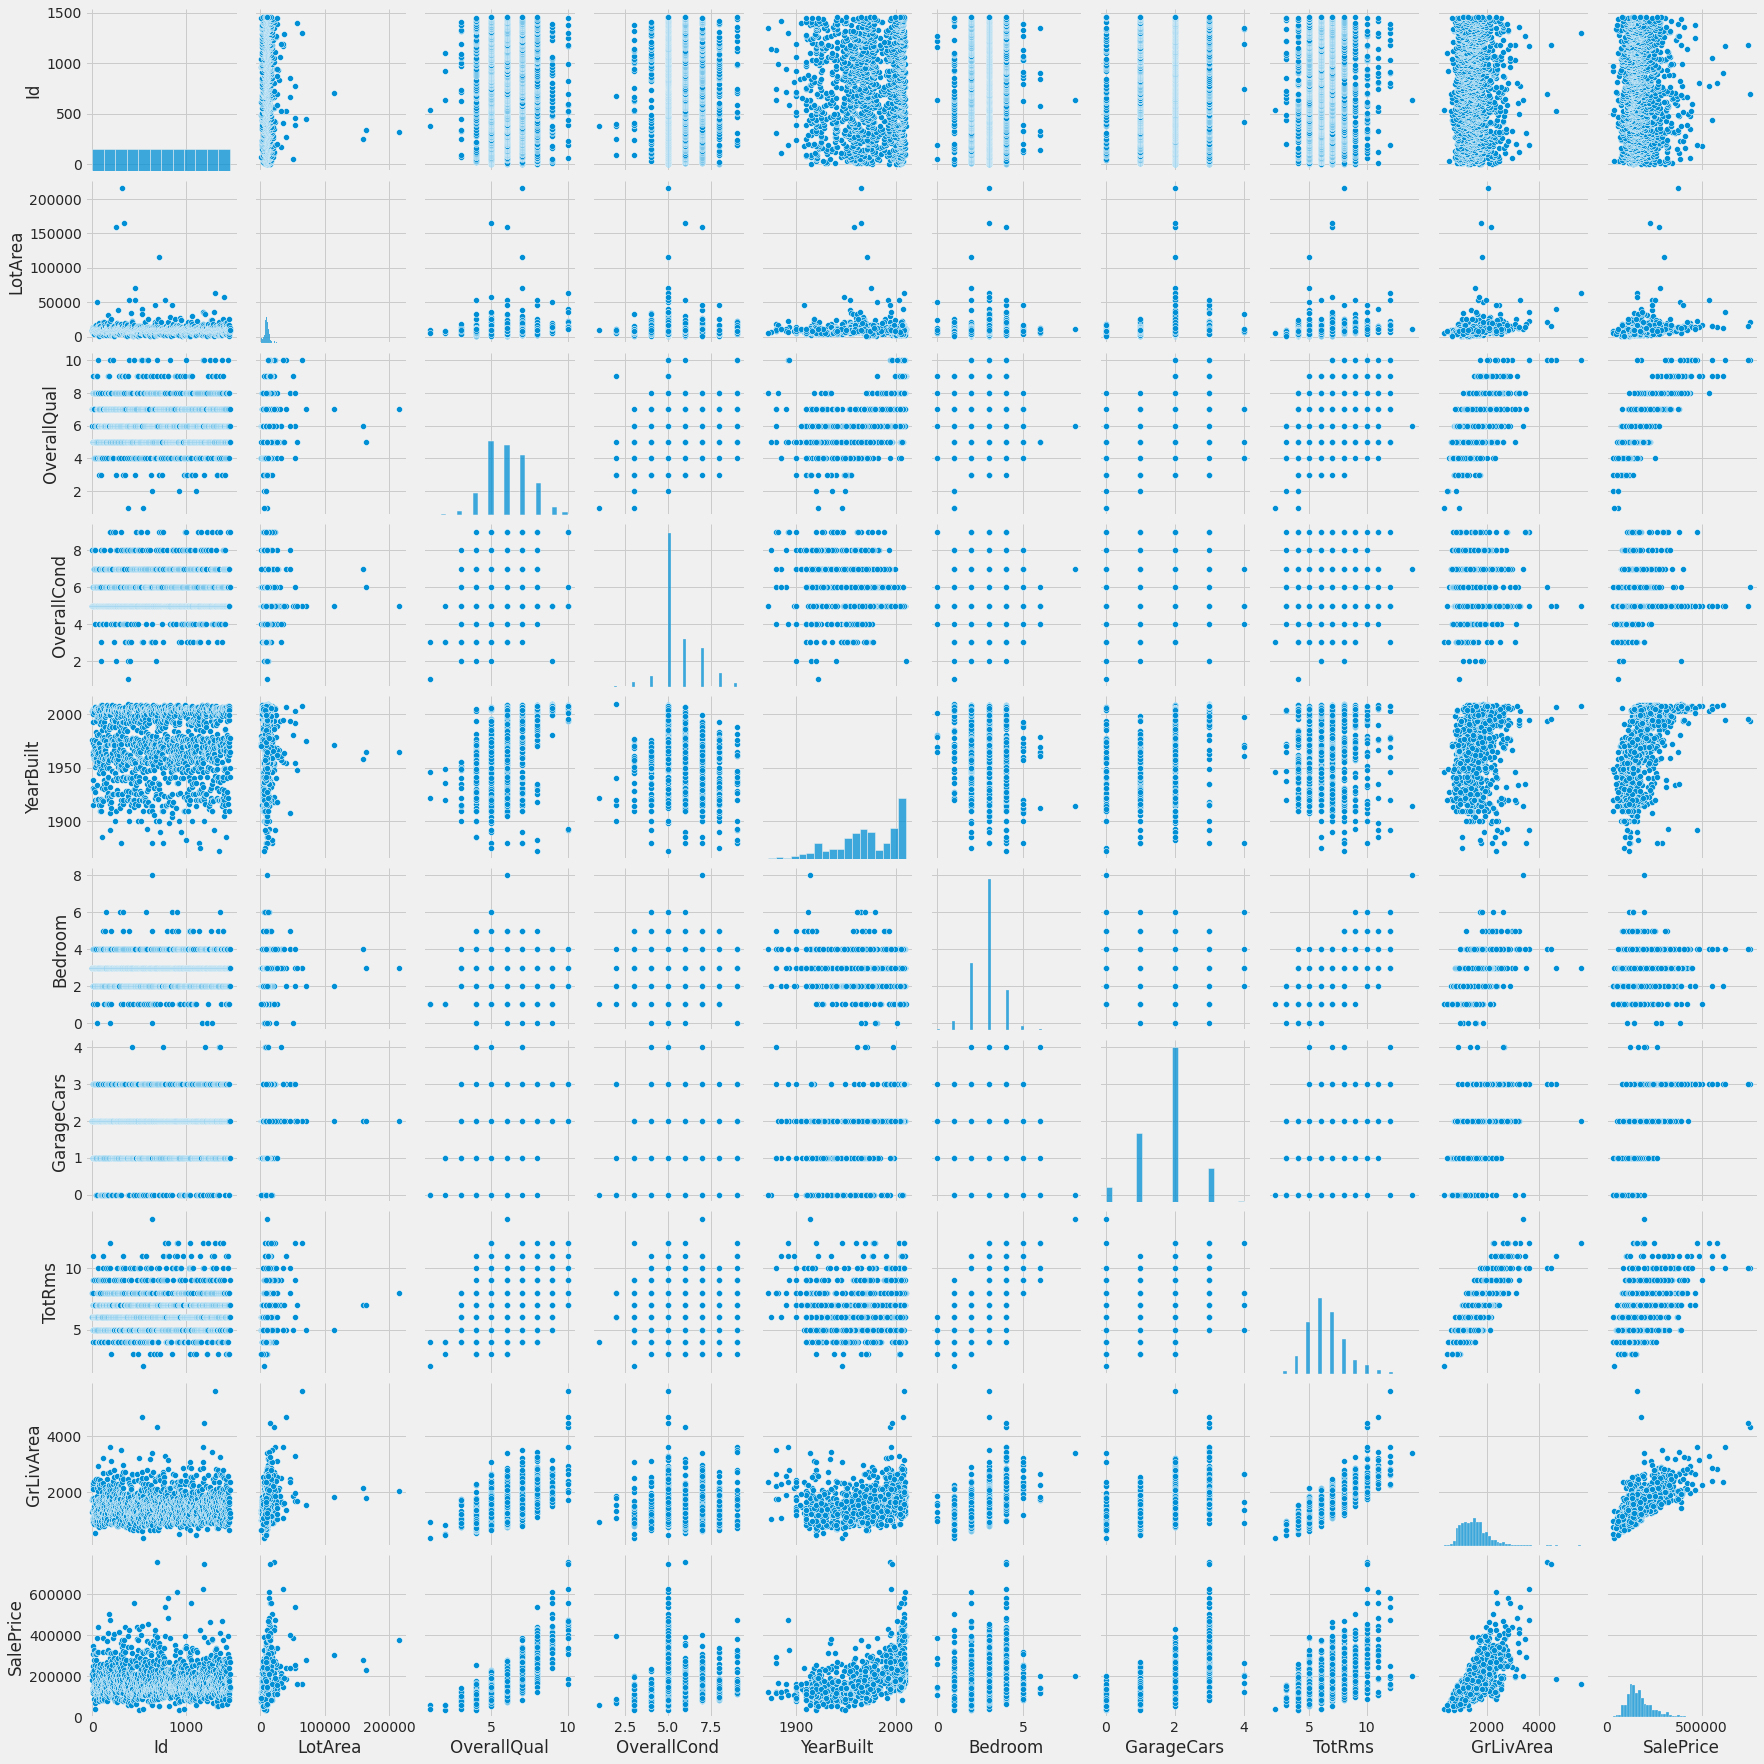

In [52]:
#To get a better understanding of the training dat
sns.pairplot(df_train)

In [53]:
#'salecondition' isn't important for price prediction. So lets remove it
df_train = df_train.drop(columns=['SaleCondition'])

df_test = df_test.drop(columns=['SaleCondition'])

#Let's remove Id in only training dataframe (We need Id of testing data frame to associate predictions)
df_train = df_train.drop(columns=['Id'])

In [54]:
df_train.head()

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SalePrice
0,8450,CollgCr,7,5,2003,3,2,8,1710,208500
1,9600,Veenker,6,8,1976,3,2,6,1262,181500
2,11250,CollgCr,7,5,2001,3,2,6,1786,223500
3,9550,Crawfor,7,5,1915,3,3,7,1717,140000
4,14260,NoRidge,8,5,2000,4,3,9,2198,250000


In [55]:
# Since the linear model cannot read strings so we have change them to an unique id(integer)
# In out dataframes Neighborhood is the coloumn that we have to change
df_test['Neighborhood'].describe()

count      1458
unique       25
top       NAmes
freq        218
Name: Neighborhood, dtype: object

In [56]:
# We have 25 unique Neighbourhood
# Generate a dictionary that maps all unique Neighbourhood to a unique id
neigh_dict = {neigh_name:i for i,neigh_name in enumerate(df_test['Neighborhood'].unique())}

# A function that uses the dictionary to retrieve the id
def encode_neigh_name(neigh_name):
    return neigh_dict[neigh_name]

In [57]:
# Apply the function to the Neighborhood column and store in new column called Neighborhood_Id
df_train['Neighborhood_Id'] = df_train['Neighborhood'].apply(encode_neigh_name)
df_test['Neighborhood_Id'] = df_test['Neighborhood'].apply(encode_neigh_name)
# We have to get an extra coloumn 'Neighborhood_Id'
df_test.head()

,Id,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SalePrice,Neighborhood_Id
0,1461,11622,NAmes,5,6,1961,2,1.0,5,896,169277.0525,0
1,1462,14267,NAmes,6,6,1958,3,1.0,6,1329,187758.3940,0
2,1463,13830,Gilbert,5,5,1997,3,2.0,6,1629,183583.6836,1
3,1464,9978,Gilbert,6,6,1998,3,2.0,7,1604,179317.4775,1
4,1465,5005,StoneBr,8,5,1992,2,2.0,5,1280,150730.0800,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


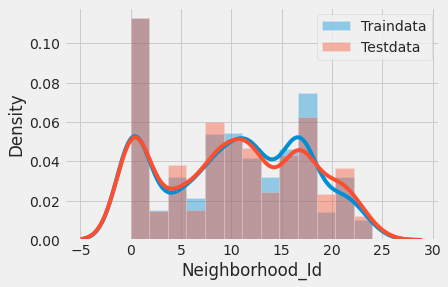

In [58]:
# Comparing the density of houses in the given neighbourhood in both dataframes
sns.distplot(df_train['Neighborhood_Id'],label='Traindata')
sns.distplot(df_test['Neighborhood_Id'],label='Testdata')
plt.legend()

In [59]:
#Now let's drop the neighborhood coloumn in dataframes
df_train = df_train.drop(columns=['Neighborhood'])
df_test = df_test.drop(columns=['Neighborhood'])
#And our data is ready to be used in the linear regression model
df_test.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,Bedroom,GarageCars,TotRms,GrLivArea,SalePrice,Neighborhood_Id
0,1461,11622,5,6,1961,2,1.0,5,896,169277.0525,0
1,1462,14267,6,6,1958,3,1.0,6,1329,187758.3940,0
2,1463,13830,5,5,1997,3,2.0,6,1629,183583.6836,1
3,1464,9978,6,6,1998,3,2.0,7,1604,179317.4775,1
4,1465,5005,8,5,1992,2,2.0,5,1280,150730.0800,2


In [60]:
# Let's convert training data frame into 2 numpy arrays X_Train , y_Train
X_Train = df_train.drop(columns=['SalePrice'])
y_Train = df_train['SalePrice'].to_numpy()
# Checking the sizes of these array's
print('X_Train =',X_Train.shape)
print('y_Train =',y_Train.shape)

X_Train = (1460, 9)
y_Train = (1460,)


In [61]:
# Let's convert testing data frame into 2 numpy arrays X_Test , y_Test
X_Test = df_test.drop(['Id', 'SalePrice'], axis = 1)
y_Test = df_test['SalePrice'].to_numpy()
print('X_Test =',X_Test.shape)
print('y_Test =',y_Test.shape)

X_Test = (1458, 9)
y_Test = (1458,)


In [62]:
# Let's imp0rt linear regressi0n class and create a m0del out of it
lin_reg_model = LinearRegression(normalize=True)
#Fitting the training values , to study and learn from it.
lin_reg_model.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [63]:
# Let us evaluate the model
#printing the intercept 
print('intercept =',lin_reg_model.intercept_) 

intercept = -1045857.5058599293


In [64]:
#printing the co-effcients w.r.t to each coloumn in X_Train
coeff_train = pd.DataFrame(lin_reg_model.coef_, X_Train.columns, columns=['Coefficient'])
coeff_train

,Coefficient
LotArea,0.834554
OverallQual,20340.194748
OverallCond,6188.394161
YearBuilt,488.314309
Bedroom,-12514.147728
GarageCars,13765.523660
TotRms,3042.112449
GrLivArea,59.788932
Neighborhood_Id,-199.670930


In [65]:
# Making the predictions
y_Predicted = lin_reg_model.predict(X_Test)

In [66]:
#Printing the predicted values
print(y_Predicted)

[117776.05736278 155275.27785962 178928.7789196  ... 140707.16764219
 102733.53043878 255228.4148507 ]


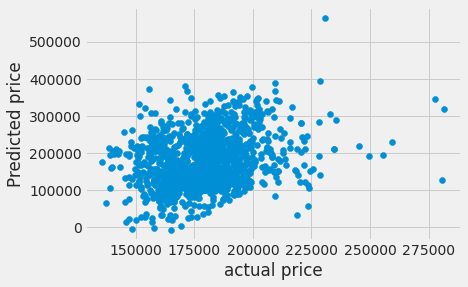

In [67]:
plt.style.use("fivethirtyeight")
plt.scatter(y_Test, y_Predicted)
plt.xlabel('actual price')
plt.ylabel('Predicted price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


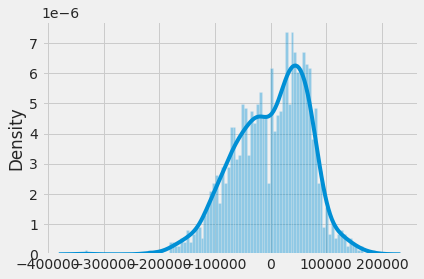

In [68]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
sns.distplot((y_Test - y_Predicted), bins=100);

In [69]:
#Caluculating the MSE error
print ('MSE is:', mean_squared_error(y_Test, y_Predicted))

MSE is: 4373085628.609693


In [70]:
# Creating a new dataframe Predicted_prices_df which have the test Id , predicted_price
Predicted_prices_df = pd.DataFrame()
Predicted_prices_df['Id'] = df_test['Id'].astype(int)

# To do this a temporary_test a new dataframe from test dataframe is formed (similar to X_Test)
temporary_test = df_test.drop(['Id','SalePrice'], axis = 1).interpolate()

# Using this frame to get the predicitions of the new dataframe Predicted_prices_df
predictions = lin_reg_model.predict(temporary_test)
Predicted_prices_df['SalePricePredicted'] = predictions

# Getting a csv file from the dataframe Predicted_prices_df
Predicted_prices_df.to_csv('Predicted_data.csv', index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


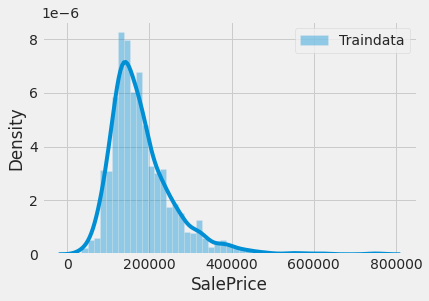

In [71]:
#sale price distribution of traindata
sns.distplot(df_train['SalePrice'],label='Traindata')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


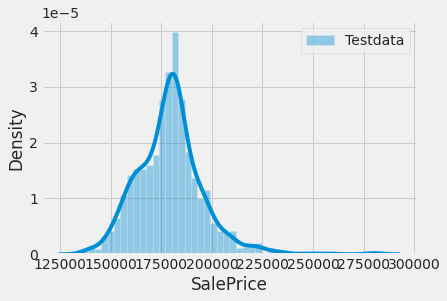

In [72]:
#sale price distribution of testdata
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
sns.distplot(df_test['SalePrice'],label='Testdata')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


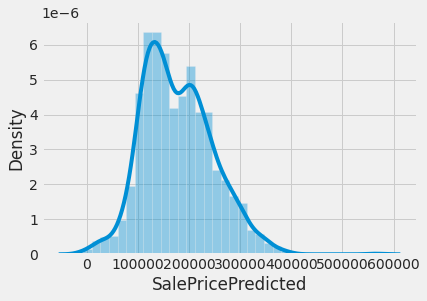

In [73]:
#distribution of the predicted sale price on testdata 
sns.distplot(Predicted_prices_df['SalePricePredicted'])